<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Construct-a-Distribution" data-toc-modified-id="Construct-a-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Construct a Distribution</a></span></li><li><span><a href="#Put-an-Observed-Value-On" data-toc-modified-id="Put-an-Observed-Value-On-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Put an Observed Value On</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the Probability of the “Tail”</a></span></li><li><span><a href="#Calculate-the-Confidence-Interval" data-toc-modified-id="Calculate-the-Confidence-Interval-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate the Confidence Interval</a></span></li><li><span><a href="#Collect-a-Sample" data-toc-modified-id="Collect-a-Sample-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Collect a Sample</a></span></li><li><span><a href="#Construct-a-Distribution-of-the-Sample-Mean" data-toc-modified-id="Construct-a-Distribution-of-the-Sample-Mean-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Construct a Distribution of the Sample Mean</a></span></li><li><span><a href="#Put-an-Observed-Mean-On" data-toc-modified-id="Put-an-Observed-Mean-On-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Put an Observed Mean On</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”-Again" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-Again-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Calculate the Probability of the “Tail” Again</a></span></li><li><span><a href="#Calculate-the-Confidence-Interval-Again" data-toc-modified-id="Calculate-the-Confidence-Interval-Again-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Calculate the Confidence Interval Again</a></span></li><li><span><a href="#The-Sample-Mean-Distribution-Over-Sample-Size" data-toc-modified-id="The-Sample-Mean-Distribution-Over-Sample-Size-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>The Sample Mean Distribution Over Sample Size</a></span></li><li><span><a href="#The-Confidence-Interval-Over-Sample-Size" data-toc-modified-id="The-Confidence-Interval-Over-Sample-Size-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The Confidence Interval Over Sample Size</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Notes</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
# mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
import warnings
warnings.filterwarnings('ignore', message="The 'normed' kwarg is deprecated")

In [3]:
np.random.seed(20180701)

# Construct a Distribution

Based on given assumptions, construct a distribution.

In [4]:
# here we assume our test statistic follows std norm
std_norm = sp.stats.norm(loc=0, scale=1)
std_norm_sample = std_norm.rvs(size=2718)  # just for viz

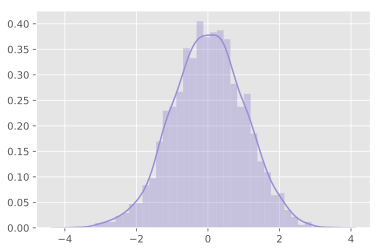

In [5]:
sns.distplot(std_norm_sample, color='C2')

# Put an Observed Value On

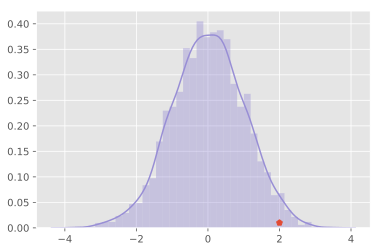

In [6]:
ov = 2
sns.distplot(std_norm_sample, color='C2')
plt.plot(ov, 0.01, 'p')

# Calculate the Probability of the “Tail”

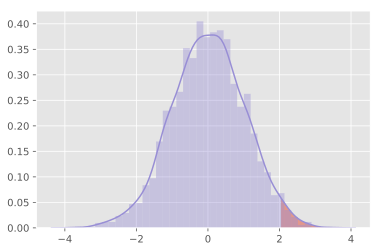

In [7]:
sns.distplot(std_norm_sample, color='C2')

ax = plt.gca()
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=kde_x>ov, alpha=0.5)

# plt.savefig('figures/03_the_tail.png', bbox_inches='tight', dpi=600)

p-value  
= Given the distribution, the probability of more extreme values than the observed value.  
= P(more extreme values | the distribution)  
= P(the tail | the distribution)  
= P(X > x | std norm) in this case

The formal definitions:

p-value  
= $ P(X \geq x \mid H) $ if right tail event  
= $ P(X \leq x \mid H) $ if left tail event  
= $ 2\min\{P(X\leq x \mid H),P(X\geq x \mid H)\} $ if double tail event

In [8]:
# sf(x) -> P(X > x)
std_norm.sf(ov)

0.022750131948179195

In [9]:
# in other words, since the dist is std norm, the prob of values > 2 sigma is 0.0228

# Calculate the Confidence Interval

In [10]:
# the `alpha=` is not our alpha but our 1-alpha, which is just confidence level
std_norm.interval(alpha=0.95)

(-1.959963984540054, 1.959963984540054)

# Collect a Sample

In [11]:
# p: population's; we won't know them out of simulations
pm = 170
ps = 5
sample = sp.stats.norm.rvs(loc=pm, scale=ps, size=100, random_state=20180706)

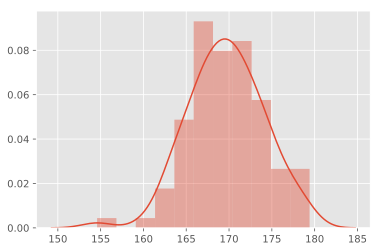

In [12]:
sns.distplot(sample)

# Construct a Distribution of the Sample Mean

In [13]:
sm = sample.mean()
ss = sample.std(ddof=1)
sem = sp.stats.sem(sample)  # standard error of the mean === std(mean of each sample(k, population))
assert sem == ss/np.sqrt(len(sample))  # if units of a sample are independent

In [14]:
# assume the sample mean follows a norm
sm_dist = sp.stats.norm(loc=sm, scale=sem)
sm_dist_sample = sm_dist.rvs(size=2718)  # just for viz

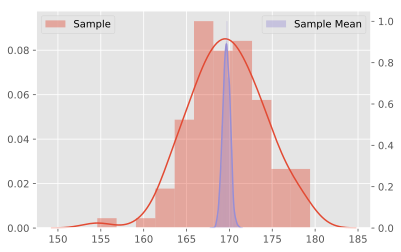

In [15]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.grid(False)

sns.distplot(sample, ax=ax1)
ax1.legend(['Sample'], loc='upper left')

sns.distplot(sm_dist_sample, color='C2', ax=ax2)
ax2.legend(['Sample Mean'], loc='upper right')

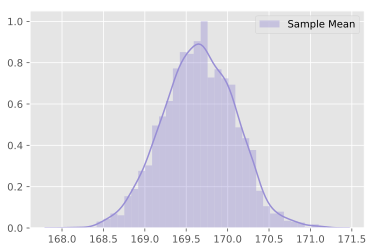

In [16]:
sns.distplot(sm_dist_sample, color='C2')
plt.legend(['Sample Mean'])

# Put an Observed Mean On

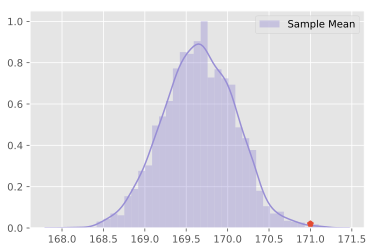

In [17]:
om = 171
sns.distplot(sm_dist_sample, color='C2')
plt.legend(['Sample Mean'])
plt.plot(om, 0.02, 'p')

# Calculate the Probability of the “Tail” Again

In [18]:
sp.stats.norm.sf(loc=sm, scale=sem, x=om)
# or

0.0011020714084128012

In [19]:
# https://en.wikipedia.org/wiki/Standard_score#Standardizing_in_mathematical_statistics
z_score = (om-sm)/sem
print(std_norm.sf(z_score))

0.0011020714084128012


# Calculate the Confidence Interval Again

In [20]:
# calculate the confidence interval
sp.stats.norm.interval(loc=sm, scale=sem, alpha=0.95)

(168.79663025079068, 170.51674198433423)

In [21]:
# statisticians already proved the sample mean follows t-dist better
# let's calculate another confidence interval based on t-dist
sp.stats.t.interval(loc=sm, scale=sem, df=len(sample)-1, alpha=0.95)

(168.78598775598337, 170.52738447914155)

# The Sample Mean Distribution Over Sample Size

In [22]:
def plot_by_sample_size(n):
    
    sample = sp.stats.norm.rvs(loc=pm, scale=ps, size=n, random_state=20180706)
    
    sm = sample.mean()
    sem = sp.stats.sem(sample)
    
    sm_dist = sp.stats.norm(loc=sm, scale=sem)
    sm_dist_sample = sm_dist.rvs(size=2718)
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.grid(False)

    sns.distplot(sample, ax=ax1)
    ax1.legend(['Sample'], loc='upper left')
    ax1.set_xlim((150, 190))

    sns.distplot(sm_dist_sample, color='C2', ax=ax2)
    ax2.legend(['Sample Mean'], loc='upper right')

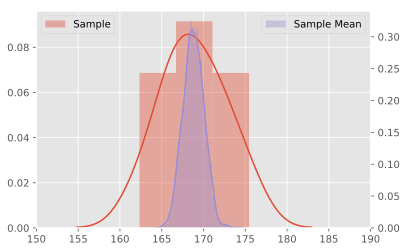

In [23]:
plot_by_sample_size(10)

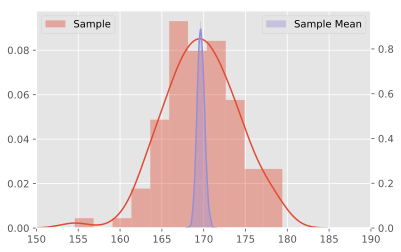

In [24]:
plot_by_sample_size(100)

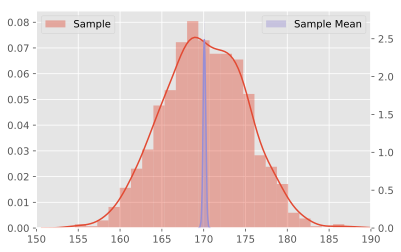

In [25]:
plot_by_sample_size(1000)

# The Confidence Interval Over Sample Size

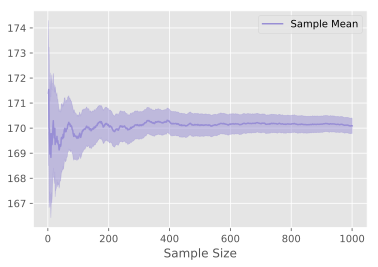

In [26]:
sample_1k = sp.stats.norm.rvs(loc=pm, scale=ps, size=1000, random_state=20180706)

# 1“+1” to avoid zero dof
first_n_v = np.arange(1+1, len(sample_1k)+1)
sm_v = [sample_1k[:i].mean() for i in first_n_v]
sem_v = [sp.stats.sem(sample_1k[:i]) for i in first_n_v]

sm_upper_v, sm_lower_v = sp.stats.norm.interval(loc=sm_v, scale=sem_v, alpha=0.95)

plt.fill_between(x=first_n_v, y1=sm_upper_v, y2=sm_lower_v, color='C2', alpha=0.5)
plt.plot(first_n_v, sm_v, color='C2')
plt.xlabel('Sample Size')
plt.legend(['Sample Mean'])

# Notes

1. We illustrate a typical one-sample z-test and the related confidence interval here.
2. Other parametric tests are similar.
3. But nonparametric tests don't base on an assumed distribution, so the illustration may not suitable.